#****ANALYSIS OVERVIEW****

This analysis uses a dataset of 100,000 medical appointments in Brazil to explore why patients might miss their appointments. Each row includes details such as:

ScheduledDay: When the appointment was made.
Neighborhood: Location of the hospital.
Scholarship: Whether the patient is part of the Bolsa Família welfare program.
No-show: Whether the patient attended (‘No’) or missed (‘Yes’) the appointment.
The goal is to identify potential reasons for missed appointments and gain insights into the Brazilian public health system. We'll start by understanding the data, then move on to data cleaning and exploratory analysis to draw conclusions.

#****Data Wrangling & EDA****

In [313]:
#importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [314]:
#Reading Data and Data Preview
df = pd.read_csv("/content/KaggleV2-May-2016.csv")
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#****HYPOTHESES FOR THE EDA****


1- Chronic Diseases and No-Shows: Do patients with chronic diseases miss appointments more or less frequently than those without chronic diseases?

2- Age and No-Shows: How does age affect the likelihood of missing an appointment? Which age group is most likely to attend their appointments?

3- Scholarships and Attendance: Are patients with scholarships more likely to attend their appointments?

4- Gender and No-Shows: Does gender have an impact on the likelihood of missing an appointment?

5- Overall No-Show Rates: What percentage of patients miss their appointments compared to those who attend?

6- Scheduling Delay and No-Shows: How does the length of time between scheduling and the appointment affect the likelihood of missing the appointment?

7- Effectiveness of SMS Reminders: Do SMS reminders reduce the rate of missed appointments?



#****General Properties****

In [315]:
# Get Columns Names
print("Columns Names:")
print(df.columns.tolist())

Columns Names:
['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']


In [316]:
# Rename incorrect column names
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap','No-show': 'No_Show'})
print(df.columns.tolist())

['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show']


In [317]:
# Get Data Size
print("Data Size is: ", df.shape)

Data Size is:  (110527, 14)


In [318]:
# Get Data Types and more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_Show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [319]:
# Get Statistical Overview
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hypertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handicap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [320]:
# Check For Missing Values
print("Number Of Missing Values:")
print(df.isnull().sum()) #Gives the total number of missing values per column


Number Of Missing Values:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_Show           0
dtype: int64


In [321]:
# Check For Duplicate Values
print("Total Duplicate Values is: ", df.duplicated().sum())

Total Duplicate Values is:  0


#****PatientID & AppointmentID****

In [322]:
# PatientID,AppointmentID represent the patient identification,AppointmentID attribute any numerical operations should not be applied to them and therefore they will be transformed into a string type
# Converting the values to str type

df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)

# Counting how many unique patients are in the dataset
unique_patient_ID= len(df['PatientId'].unique())
print("unique_patient_ID = ", unique_patient_ID)

unique_App_ID = len(df['AppointmentID'].unique())
print("unique_App_ID = ", unique_App_ID)

# Printing their new data type
print("Type of patient ID : ",type(df["PatientId"][0]))
print("Type of Appointment ID : ",type(df["AppointmentID"][0]))



unique_patient_ID =  62299
unique_App_ID =  110527
Type of patient ID :  <class 'str'>
Type of Appointment ID :  <class 'str'>


In [323]:
# Redefining the dataset index to the appointment IDs
df.set_index('AppointmentID', drop=True, inplace=True)

#****ScheduledDay and AppointmentDay****

In [325]:
# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [326]:
# Dropping 'PatientId' from the dataframe as they are just some system genrated numbers
df.drop(['PatientId'], axis=1, inplace=True)


In [329]:
# Calculate the difference in days between ScheduledDay and AppointmentDay
df['Waiting_Time_days'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days


# Group by 'Waiting_Time_days' and  'No_show'
df_grouped = df.groupby('Waiting_Time_days')['No_Show'].value_counts(normalize=True).unstack().fillna(0)
df_grouped['No_Show_Rate'] = df_grouped['Yes']


# Handle and remove records with negative waiting times
# Check and drop rows where waiting time is negative
dropIx = df[df['Waiting_Time_days'] < 0].index
df.drop(dropIx, inplace=True)

# Print the count of records where waiting time was negative
print(f"There are {df[df.Waiting_Time_days < 0].shape[0]} records where the waiting time is less than zero.")



There are 0 records where the waiting time is less than zero.


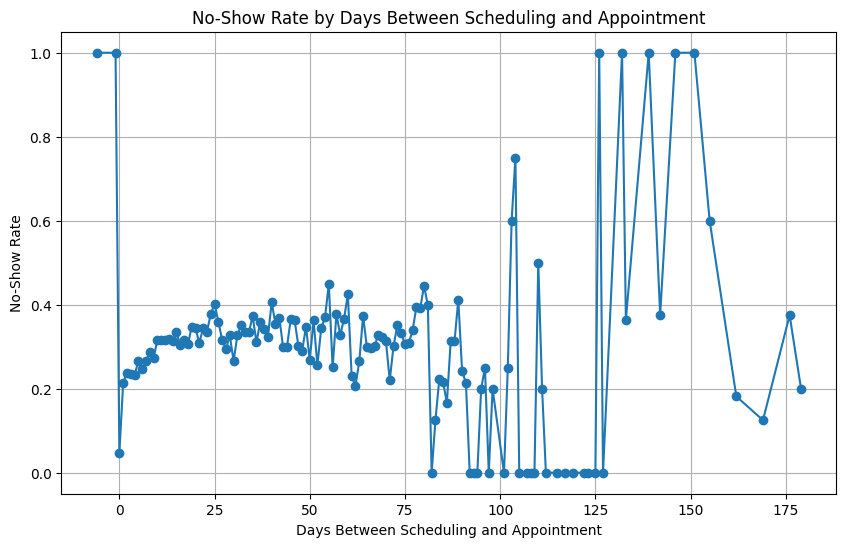

In [330]:
# Plot the no-show rate vs. days between scheduling and appointment
plt.figure(figsize=(10, 6))
plt.plot(df_grouped.index, df_grouped['No_Show_Rate'], marker='o')
plt.title('No-Show Rate by Days Between Scheduling and Appointment')
plt.xlabel('Days Between Scheduling and Appointment')
plt.ylabel('No-Show Rate')
plt.grid(True)
plt.show()

#****Categorical Attributes****

In [331]:
# Exploring Diversity (unique values)
df.nunique()

,0
Gender,2
ScheduledDay,111
AppointmentDay,27
Age,104
Neighbourhood,81
Scholarship,2
Hypertension,2
Diabetes,2
Alcoholism,2
Handicap,5


In [332]:
# Knowing Unique Values & Helping in Univariate Graphical Analysis
# Categorical Data
# List of categorical columns
categorical_columns = ["Gender", "Scholarship", "Hypertension", 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show']

# Iterate over the categorical columns and print unique values
for column in categorical_columns:
    if column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}': {unique_values}")



Unique values in 'Gender': ['F' 'M']
Unique values in 'Scholarship': [0 1]
Unique values in 'Hypertension': [1 0]
Unique values in 'Diabetes': [0 1]
Unique values in 'Alcoholism': [0 1]
Unique values in 'Handicap': [0 1 2 3 4]
Unique values in 'SMS_received': [0 1]
Unique values in 'No_Show': ['No' 'Yes']


# ****Checking Handicap Attribute****

In [333]:
# Converting all 'Handicap' values higher than 0 to 1
df['Handicap'] = np.where(df['Handicap']>0, 1, 0)

In [334]:
# Changing Some Data Types
# Convert all the columns that have 'Yes' or 'No' values into objects
changed_col = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show']

for column in changed_col:
    if column in df.columns:
        df[column] = df[column].astype('object')

print(df.dtypes)

Gender                       object
ScheduledDay         datetime64[ns]
AppointmentDay       datetime64[ns]
Age                           int64
Neighbourhood                object
Scholarship                  object
Hypertension                 object
Diabetes                     object
Alcoholism                   object
Handicap                     object
SMS_received                 object
No_Show                      object
Waiting_Time_days             int64
dtype: object


In [336]:
# Print a sample of the data
df.sample(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Waiting_Time_days
AppointmentID,,,,,,,,,,,,,
5740647,F,2016-05-25,2016-05-30,70,SANTA CLARA,0,1,0,0,0,1,No,5
5654721,F,2016-05-03,2016-05-05,60,JOANA D´ARC,0,1,1,0,0,0,No,2
5710429,F,2016-05-17,2016-05-20,34,SANTOS DUMONT,0,0,0,0,0,0,Yes,3


#****Checking Age Attribute****  


In [337]:
# Unique values for Age Column
unique_ages = df['Age'].unique()
print("Unique values in 'Age':", unique_ages)

Unique values in 'Age': [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [338]:
# knowing the Number Of Negative and equal to Zero values

print("Patients with Age < -1 :", (df["Age"] < -1).sum())
print("Patients with Age = 0 :", (df["Age"] == 0).sum())


Patients with Age < -1 : 0
Patients with Age = 0 : 3539


In [339]:
#As there is only 1 patient with Age less than 0 we will delete that record assuming that they was a typo
df = df[df.Age >= 0]


In [340]:
df[(df.Age <= 0) & ((df.Hypertension.astype(int) == 1) | (df.Diabetes.astype(int) == 1) | (df.Alcoholism.astype(int) == 1))]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show,Waiting_Time_days
AppointmentID,,,,,,,,,,,,,


From the analysis, we can see that patients with an age of zero are likely babies because none of them have hypertension, diabetes, or alcoholism.

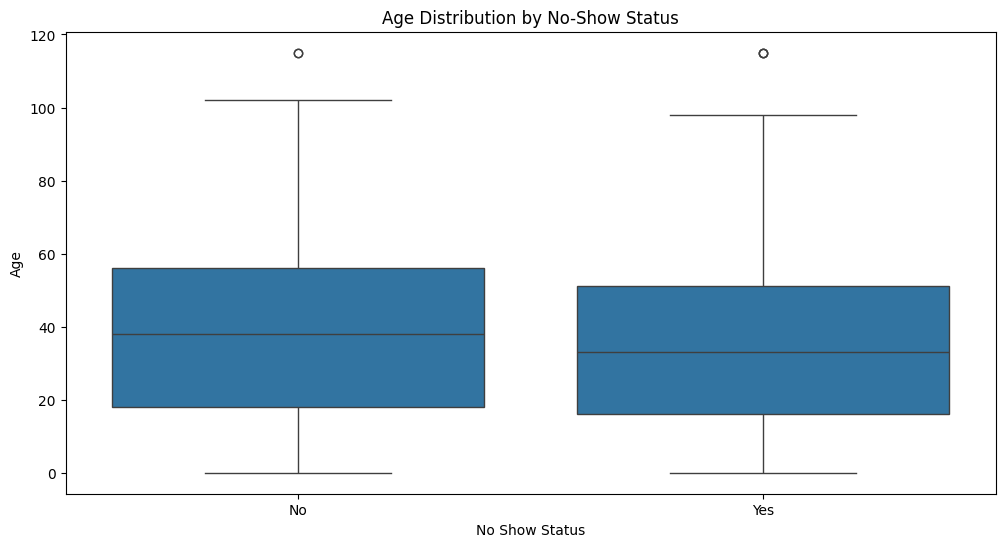

In [341]:
# Box plot to show age distribution with respect to no-show status
plt.figure(figsize=(12, 6))
sns.boxplot(x='No_Show', y='Age', data=df)
plt.title('Age Distribution by No-Show Status')
plt.xlabel('No Show Status')
plt.ylabel('Age')
plt.show()

# ****Checking Gender Attribute****

In [342]:
# Counting gender values
df.Gender.value_counts()

,count
Gender,
F,71836
M,38685


In [343]:
# Group by 'Gender' and 'No_Show', then count occurrences
grouped_counts = df.groupby(['Gender', 'No_Show']).size().unstack(fill_value=0)

# Print the grouped counts
print(grouped_counts)

# Calculate the percentage of no-shows
percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100


No_Show     No    Yes
Gender               
F        57245  14591
M        30962   7723


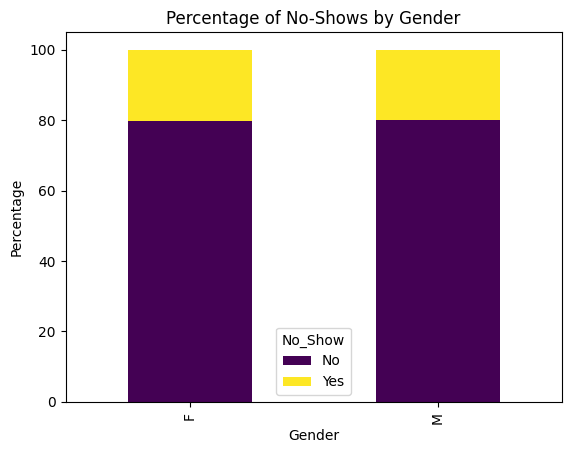

In [344]:
# Calculate the percentage of no-shows
percentages = grouped_counts.div(grouped_counts.sum(axis=1), axis=0) * 100

# Plotting
ax = percentages.plot(kind='bar', stacked=True, colormap='viridis')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of No-Shows by Gender')
plt.show()

#****No_Show Attribute****

In [345]:
# Counting N0_Show values
no_show_counts = df.No_Show.value_counts()
no_show_counts

,count
No_Show,
No,88207
Yes,22314


In [346]:
# Counting and getting the percentage of each value in 'No_Show'
percentages = df['No_Show'].value_counts(normalize=True) * 100

# Print the percentages
print(percentages)

No_Show
No     79.810172
Yes    20.189828
Name: proportion, dtype: float64


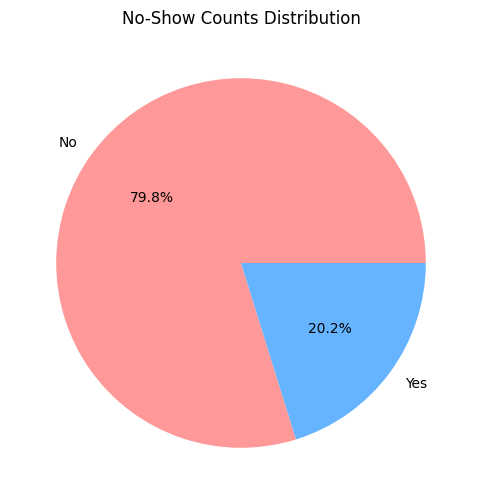

In [347]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(no_show_counts, labels=no_show_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('No-Show Counts Distribution')
plt.show()

#****Chronic Disease Attribute****

In [348]:
# Group by 'Hypertension', 'Diabetes', 'Handicap', and 'No_Show', then count occurrences
grouped_counts = df.groupby(['Hypertension', 'Diabetes', 'Handicap', 'No_Show']).size().reset_index(name='Count')

# Pivot table to get counts of attendance (Yes/No) for each disease category
pivot_table = df.pivot_table(index=['Hypertension', 'Diabetes', 'Handicap'], columns='No_Show', aggfunc='size', fill_value=0)
# Print the grouped counts
print("Grouped counts:")
print(grouped_counts)

# Print the pivot table
print("\nPivot table:")
print(pivot_table)


Grouped counts:
    Hypertension  Diabetes  Handicap No_Show  Count
0              0         0         0      No  68017
1              0         0         0     Yes  18016
2              0         0         1      No    993
3              0         0         1     Yes    237
4              0         1         0      No   1131
5              0         1         0     Yes    285
6              0         1         1      No     37
7              0         1         1     Yes      4
8              1         0         0      No  12183
9              1         0         0     Yes   2522
10             1         0         1      No    501
11             1         0         1     Yes    109
12             1         1         0      No   5042
13             1         1         0     Yes   1086
14             1         1         1      No    303
15             1         1         1     Yes     55

Pivot table:
No_Show                            No    Yes
Hypertension Diabetes Handicap           

In [349]:
# Calculate the total number of people with each disease category
totals = pivot_table.sum(axis=1)

# Calculate percentages
percentages = pivot_table.div(totals, axis=0) * 100

# Print the percentages
print("\nPercentages of attendance and no-show within each disease group:")
print(percentages)


Percentages of attendance and no-show within each disease group:
No_Show                                No        Yes
Hypertension Diabetes Handicap                      
0            0        0         79.059198  20.940802
                      1         80.731707  19.268293
             1        0         79.872881  20.127119
                      1         90.243902   9.756098
1            0        0         82.849371  17.150629
                      1         82.131148  17.868852
             1        0         82.278068  17.721932
                      1         84.636872  15.363128


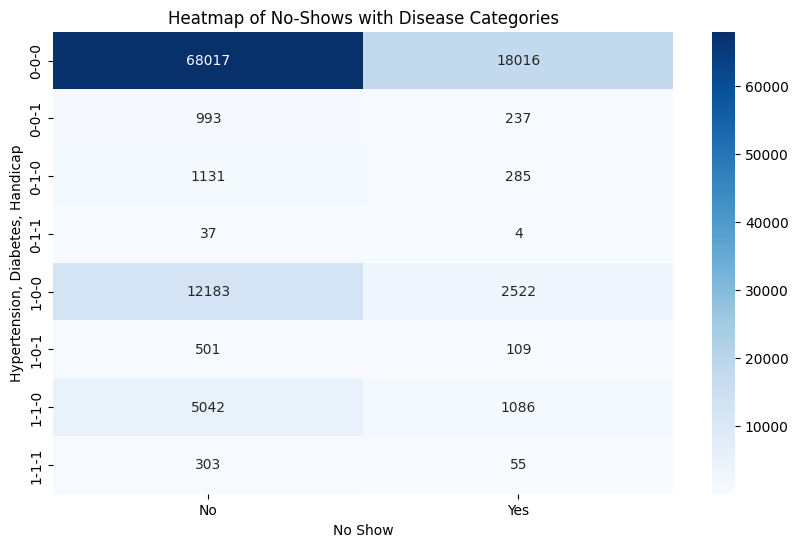

In [350]:
# Pivot table to get counts of attendance (Yes/No) for each disease category
pivot_table = df.pivot_table(index=['Hypertension', 'Diabetes', 'Handicap'], columns='No_Show', aggfunc='size', fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of No-Shows with Disease Categories')
plt.xlabel('No Show')
plt.ylabel('Hypertension, Diabetes, Handicap')
plt.show()

#****Scholarship Attribute****

In [351]:
# Groub by 'Scholarships' and 'No_Show'
scolar_counts = df.groupby(['Scholarship','No_Show']).size().unstack(fill_value=0)

# print the scolar_counts
print(scolar_counts)

No_Show         No    Yes
Scholarship              
0            79924  19736
1             8283   2578


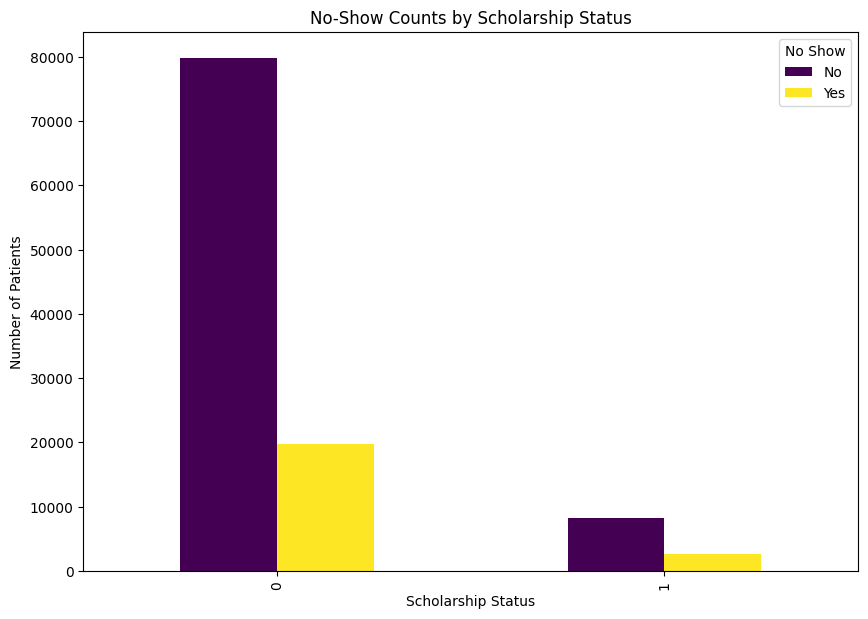

In [352]:
# Create the grouped bar chart
scolar_counts.plot(kind='bar', colormap='viridis', figsize=(10, 7))
plt.title('No-Show Counts by Scholarship Status')
plt.xlabel('Scholarship Status')
plt.ylabel('Number of Patients')
plt.legend(title='No Show')
plt.show()

#****SMS_Recieved Attribute****

In [353]:
# Groub by 'SMS_received' and 'No_Show'
SMS_counts = df.groupby(['SMS_received','No_Show']).size().unstack(fill_value=0)

# print the SMS_counts
print(SMS_counts)

No_Show          No    Yes
SMS_received              
0             62509  12530
1             25698   9784


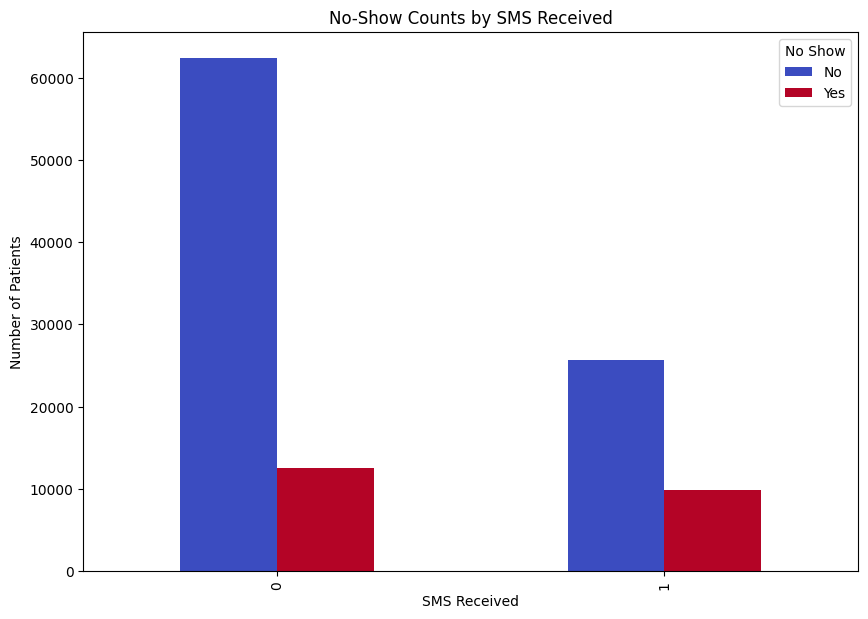

In [354]:
# Create the stacked bar chart
SMS_counts.plot(kind='bar', colormap='coolwarm', figsize=(10, 7))
plt.title('No-Show Counts by SMS Received')
plt.xlabel('SMS Received')
plt.ylabel('Number of Patients')
plt.legend(title='No Show')
plt.show()

#****Correlation Analysis****

In [356]:
# Correlation Analysis
df_numeric = df.select_dtypes(include=[np.number])  # Select only numeric columns
corr_matrix = df_numeric.corr()  # Calculate correlation matrix
corr_matrix

,Age,Waiting_Time_days
Age,1.000000,0.034813
Waiting_Time_days,0.034813,1.000000


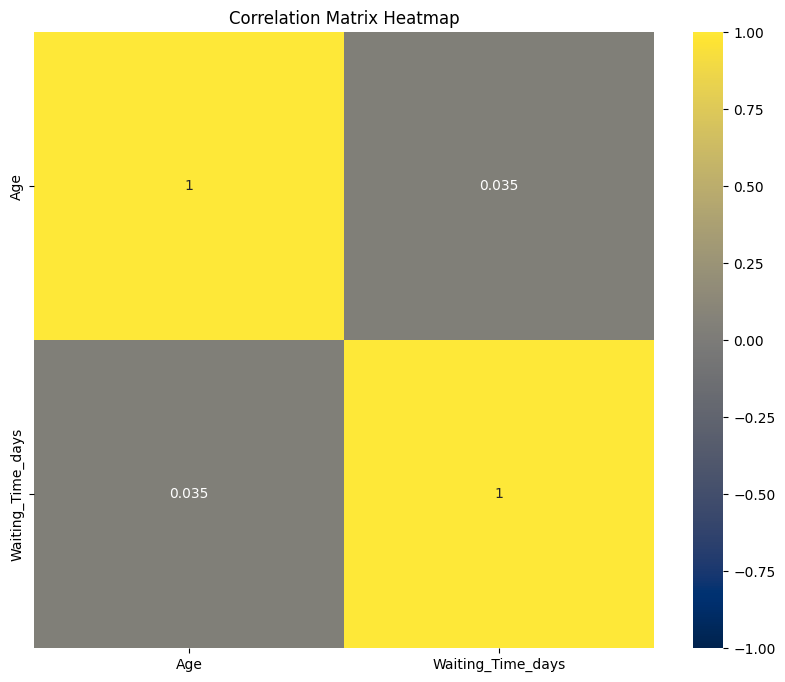

In [357]:
# Visualizing Correlation Matrix (quick overview of the correlation matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='cividis', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

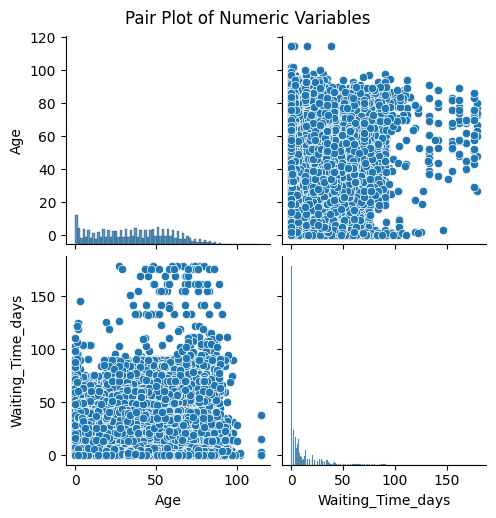

In [360]:
# Detailed exploration of relationships between all pairs
sns.pairplot(df_numeric)
# Adding a title to the entire figure
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)  # y=1.02 adjusts the title position upwards
plt.show()

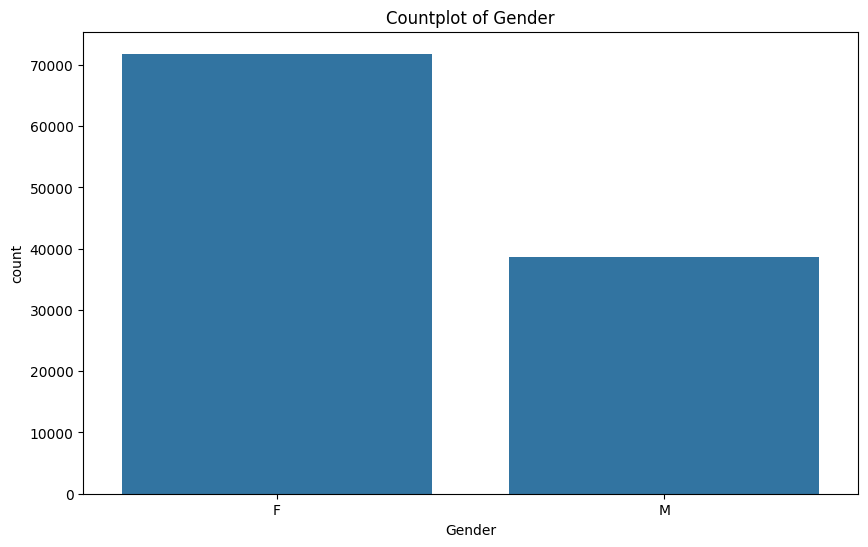

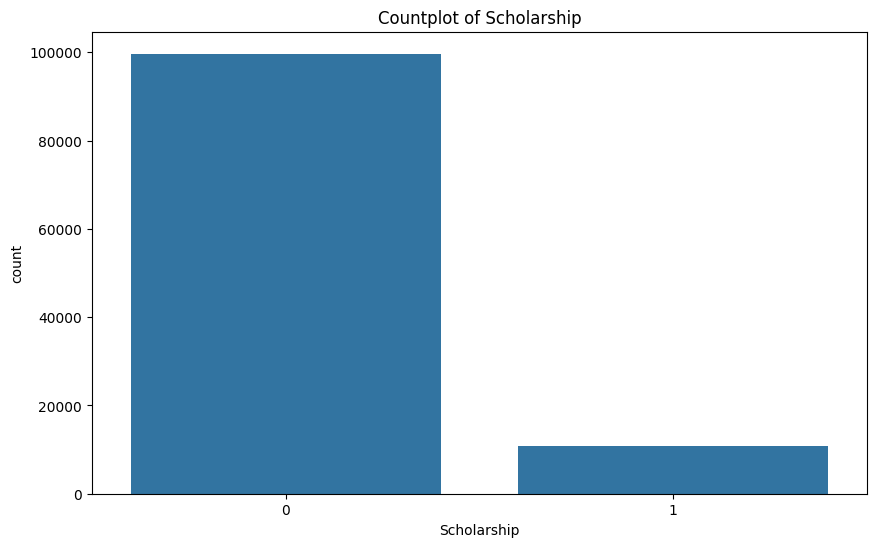

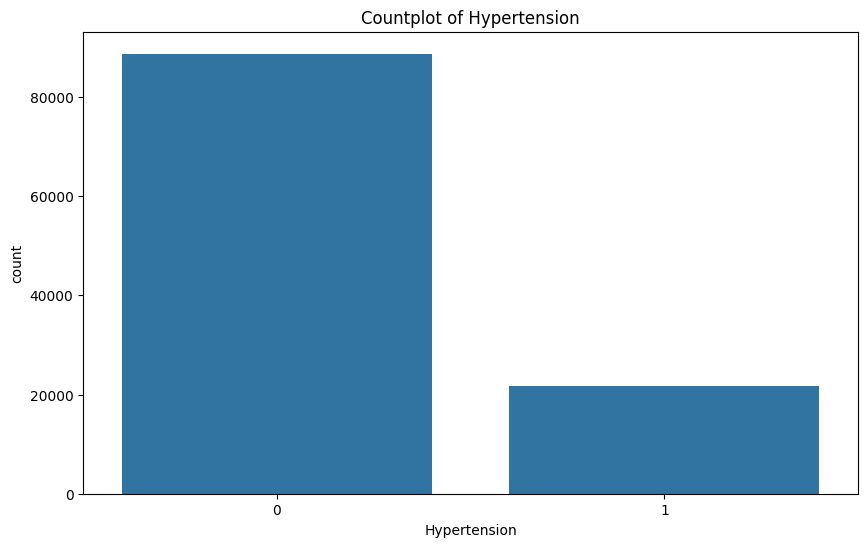

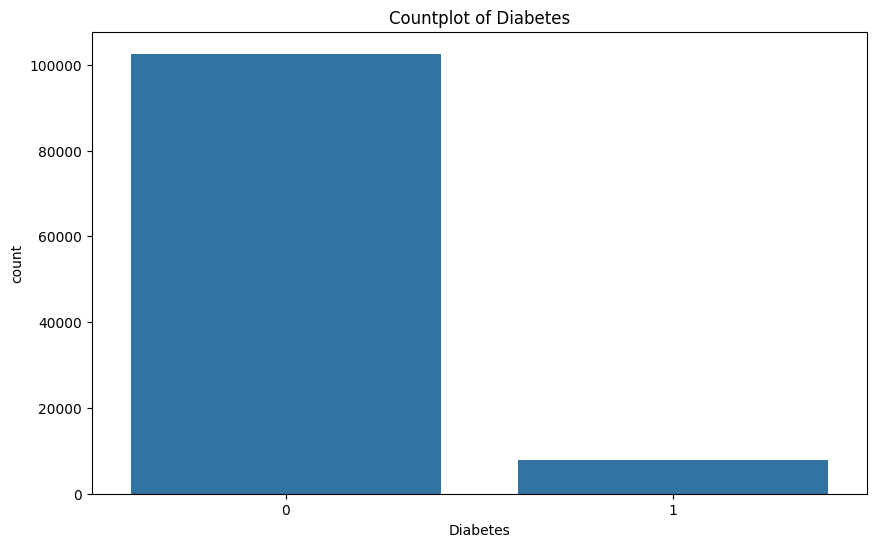

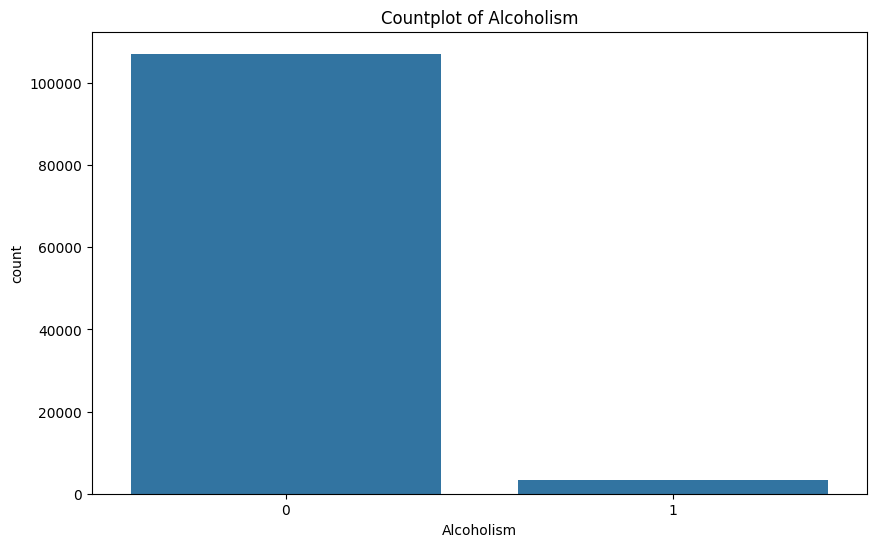

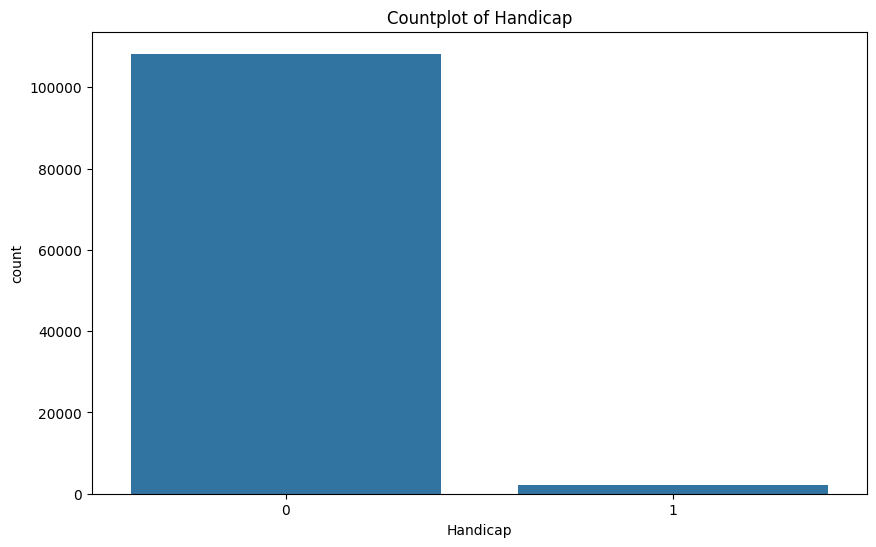

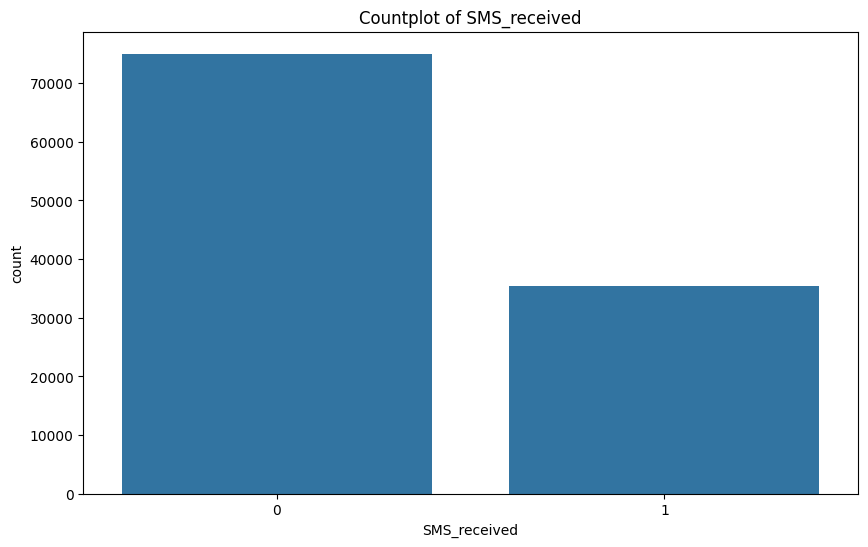

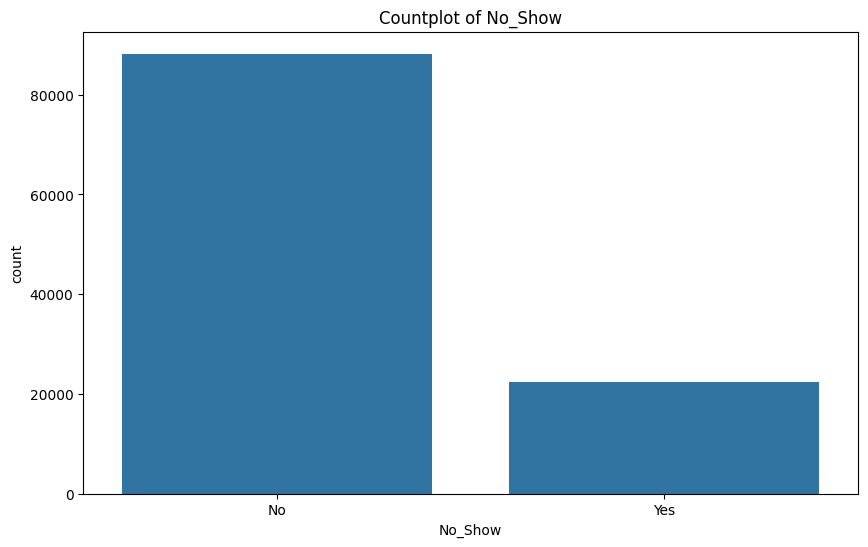

In [361]:
# Using a Countplot to understand those unique values
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    # Check if the column exists in the DataFrame
    if column in df.columns:
        sns.countplot(x=column, data=df)
        plt.title(f'Countplot of {column}')
        plt.show()
    else:
        print(f"Column '{column}' not found in DataFrame.")


#****INSIGHTS****

**1- Chronic Diseases and No-Shows :**
The heatmap does not reveal a strong link between having chronic diseases and a higher likelihood of missing appointments. Although there are significant no-show numbers among patients with conditions like Hypertension, these rates are not disproportionately high compared to those without chronic conditions.
This indicates that chronic conditions alone might not be a major factor in no-show behavior. Other variables or combined factors may need to be examined to better understand the reasons behind missed appointments.


**2- Age Distribution and No-Show Status :**
The box plot analysis shows that age does not strongly influence whether a patient shows up for an appointment. Both groups ("No" and "Yes" for no-shows) have similar age distributions, with overlapping age ranges and comparable medians. The presence of outliers in both groups suggests that age is not a major factor in predicting appointment attendance.

While age alone doesn't seem to be a key factor in no-show behavior based on this analysis, further investigation into other variables might uncover more intricate relationships that could impact no-show rates


**3- Scholarships and Attendance :**
Patients without a scholarship (Scholarship Status = 0) have a much higher rate of missing appointments compared to those with a scholarship.
Patients with a scholarship (Scholarship Status = 1) tend to show up for their appointments more often.
There is a clear relationship between scholarship status and appointment attendance. Patients with scholarships are more likely to attend their appointments than those without scholarships.


**4- Gender and No-Shows :**
Out of all appointments, 79.81% were attended, while 20.19% were missed.The no-show rates are nearly the same for both males and females, matching the overall rate of 20.19%. This suggests that gender does not play a significant role in whether someone misses an appointment.Since gender does not influence no-show rates, focusing on other factors or their interactions might be more effective in understanding and predicting no-show behavior.


**5- Overall No-Show Rates:**
 What percentage of patients miss their appointments compared to those who attend?
 79.8% of patients attended their appointments (labeled as "No" for no-show).
20.2% of patients missed their appointments (labeled as "Yes" for no-show).
The chart shows that the majority of patients (nearly 80%) attended their appointments, while about 20% did not. This indicates a no-show rate of 20.2%, suggesting that a considerable proportion of patients are missing their appointments.No-shows are a notable concern, with 1 in 5 patients missing their scheduled appointments.


**6- Scheduling Delay and No-Shows :**
How does the length of time between scheduling and the appointment affect the likelihood of missing the appointment?
As the number of days between scheduling and the appointment increases from 0 to around 80 days, the no-show rate tends to gradually increase. This suggests that longer delays between scheduling and the appointment might contribute to a higher likelihood of missing the appointment.
After 100 days, the no-show rate exhibits significant variability, with some periods showing a very high no-show rate close to 1.0. This indicates that very long scheduling delays (over 100 days) are strongly associated with missed appointments, but the data in this range is more erratic, possibly due to fewer data points.As the delay between scheduling and the appointment increases, the likelihood of a no-show tends to increase, particularly after 80 days. Extremely long delays (over 100 days) show erratic but generally higher no-show rates, indicating a significant risk of missed appointments with extended scheduling delays.


**7- Effectiveness of SMS Reminders :**
= No SMS Received (SMS_received = 0):
- No-Show Count: 12,535
- Show Count: 62,510
= SMS Received (SMS_received = 1):
- No-Show Count: 9,784
- Show Count: 25,698
The data indicates that a significant number of patients still missed their appointments despite receiving SMS reminders (9,784 no-shows with SMS vs. 12,535 without SMS).
While there is a decrease in the absolute number of no-shows for those who received an SMS, the reduction is not substantial. This suggests that SMS reminders alone may not be highly effective in reducing missed appointments.
SMS reminders do not have a strong impact on reducing missed appointments. The data shows only a slight difference in no-show rates between patients who received an SMS and those who did not, indicating that other factors might be more influential in reducing no-shows.

#****ٌReferences****

1- DATASET LINK: https://www.kaggle.com/datasets/joniarroba/noshowappointments/code?datasetId=792&sortBy=voteCount


2- https://media.licdn.com/dms/document/media/D4E1FAQH1_v2eLrUGpQ/feedshare-document-pdf-analyzed/0/1724103638508?e=1725494400&v=beta&t=cwdoB9BsLbl-I5ZigkIZoNLd5nCOqE9VzPc12fFIgN8

3- https://www.kaggle.com/code/tsilveira/applying-heatmaps-for-categorical-data-analysis

4- https://www.kaggle.com/code/samratp/predict-show-noshow-eda-visualization-model

5- https://www.datacamp.com/tutorial/exploratory-data-analysis-python (chapter 1)


6-  https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/

